# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
# dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirE:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import logging
logging.basicConfig(level=logging.INFO)
from extractors.loader import Loader

In [5]:
loader = Loader(dataDir, 'inD')

# LocationData - for aggregation

**get all the unique crossing ids**
```
loc2data = loader.getLocationData(2)
loc2data.getUniqueCrossingIds()
```
**get all the crossing data by scene config**
```
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)
crossingDf = loc2data.getCrossingDf()
```

In [6]:
loc2data = loader.getLocationData(2, useSceneConfigToExtract=True)

INFO:root:recordingIds: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [7]:
crossingDf = loc2data.getCrossingDf()

pedIds: 100%|██████████| 154/154 [00:22<00:00,  6.88it/s]
INFO:root:extracting crossing data for scene 11 from recording 18
pedIds: 100%|██████████| 122/122 [00:14<00:00,  8.33it/s]
INFO:root:extracting crossing data for scene 11 from recording 19
pedIds: 100%|██████████| 155/155 [00:21<00:00,  7.14it/s]
INFO:root:extracting crossing data for scene 11 from recording 20
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.11it/s]
INFO:root:extracting crossing data for scene 11 from recording 21
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.09it/s]
INFO:root:extracting crossing data for scene 2 from recording 21
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.10it/s]
INFO:root:extracting crossing data for scene 22 from recording 21
pedIds: 100%|██████████| 187/187 [00:30<00:00,  6.04it/s]
INFO:root:extracting crossing data for scene 3 from recording 21
pedIds: 100%|██████████| 187/187 [00:31<00:00,  5.89it/s]
INFO:root:extracting crossing data for scene 4 from recording 21
pedIds: 100

# Saving and Loading pre--processed Location data

In [8]:
loc2data.saveCrossingDf("../data") # only crossing dataframe

In [9]:
loc2data.save("../data") # whole thing as a dill object

# Validate if there are trajectories not captured by the scene-based extractor

In [10]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(loader)

2022-09-26 10:49:05.433 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/18_background.png


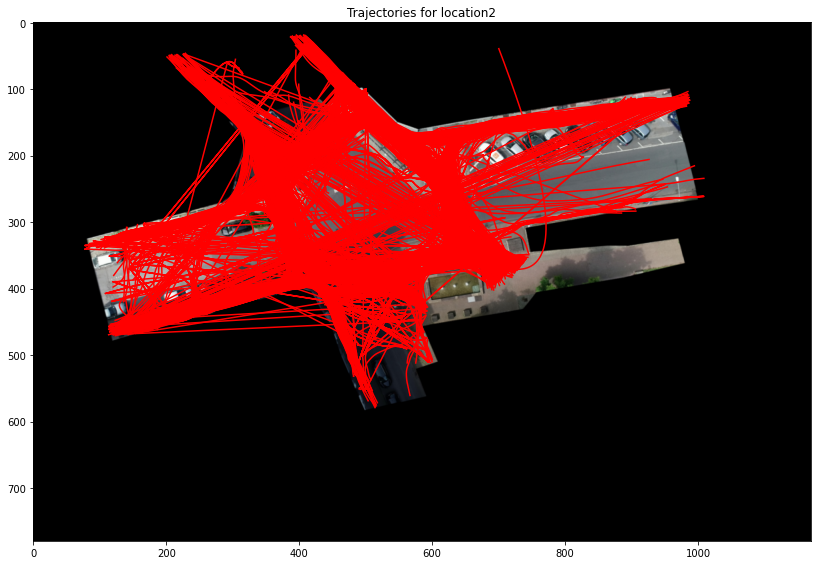

In [13]:
# visualizer.showLocationCrossingTracks(loc2data)

In [11]:
sceneData = loc2data.getSceneCrossingData(1, 10, 5, refresh=False)
# sceneDf = loc2data.getSceneCrossingDf('1', 0, 0)

2022-09-26 22:21:33.473 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 22:21:33.480 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 22:21:33.480 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 61/61 [00:05<00:00, 11.29it/s]


In [12]:
sceneData.data.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId
0,0,21,4,0,0,61.55312,-23.54895,273.20034,0.0,0.0,-0.00121,-1.47324,0.31629,-0.06437,21004,1
1,1,21,4,1,1,61.55339,-23.60762,273.26108,0.0,0.0,0.01148,-1.47685,0.32241,-0.06414,21004,1
2,2,21,4,2,2,61.55439,-23.66648,273.33567,0.0,0.0,0.02430,-1.48056,0.32855,-0.06304,21004,1
3,3,21,4,3,3,61.55585,-23.72595,273.42348,0.0,0.0,0.03727,-1.48415,0.33479,-0.06106,21004,1
4,4,21,4,4,4,61.55763,-23.78605,273.52389,0.0,0.0,0.05048,-1.48738,0.34117,-0.05834,21004,1


2022-09-26 22:21:40.562 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


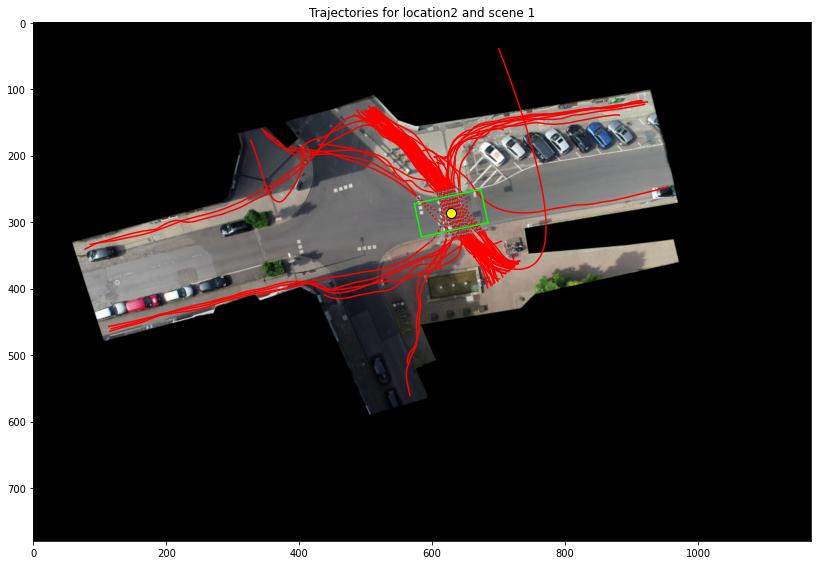

In [13]:
visualizer.showLocationSceneData(sceneData)

2022-09-26 22:21:53.297 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 22:21:53.298 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 22:21:53.299 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s]
2022-09-26 22:21:53.441 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


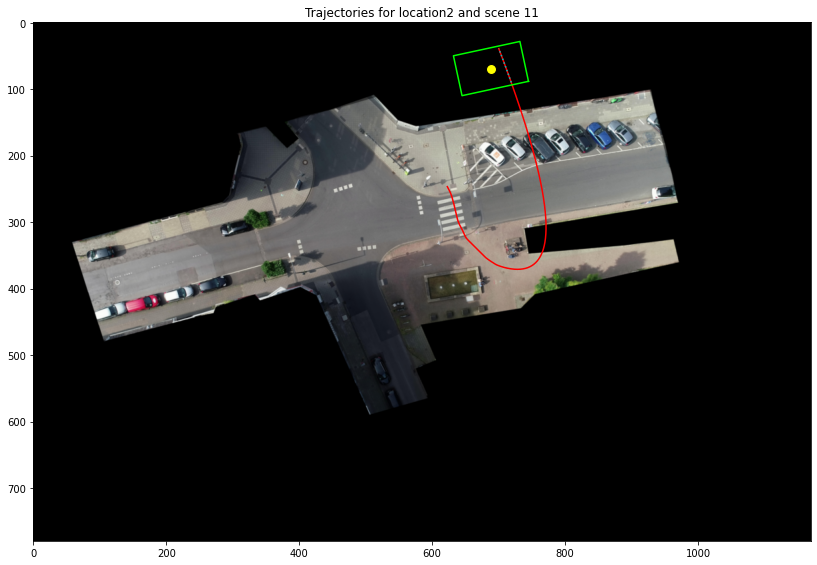

In [14]:
scene2Data = loc2data.getSceneCrossingData(11, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene2Data)

2022-09-26 22:22:36.620 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 22:22:36.623 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 22:22:36.624 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 20/20 [00:02<00:00,  9.98it/s]
2022-09-26 22:22:39.284 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


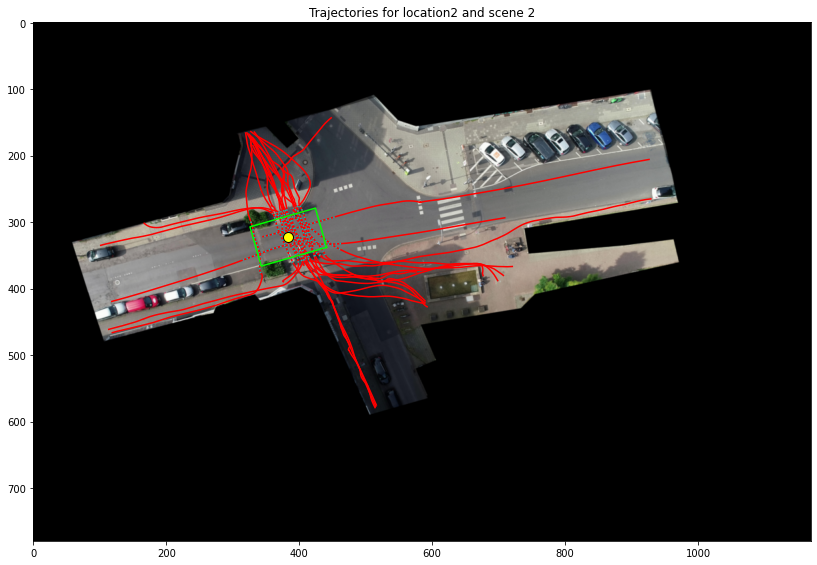

In [15]:
scene20Data = loc2data.getSceneCrossingData(20, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene20Data)

scene21Data = loc2data.getSceneCrossingData(21, 20, 9, refresh=False)
visualizer.showLocationSceneData(scene21Data, onlyClipped=False)

scene22Data = loc2data.getSceneCrossingData(22, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene22Data)

2022-09-26 22:23:43.011 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 22:23:43.015 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 22:23:43.016 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 42/42 [00:04<00:00,  8.92it/s]
2022-09-26 22:23:48.893 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


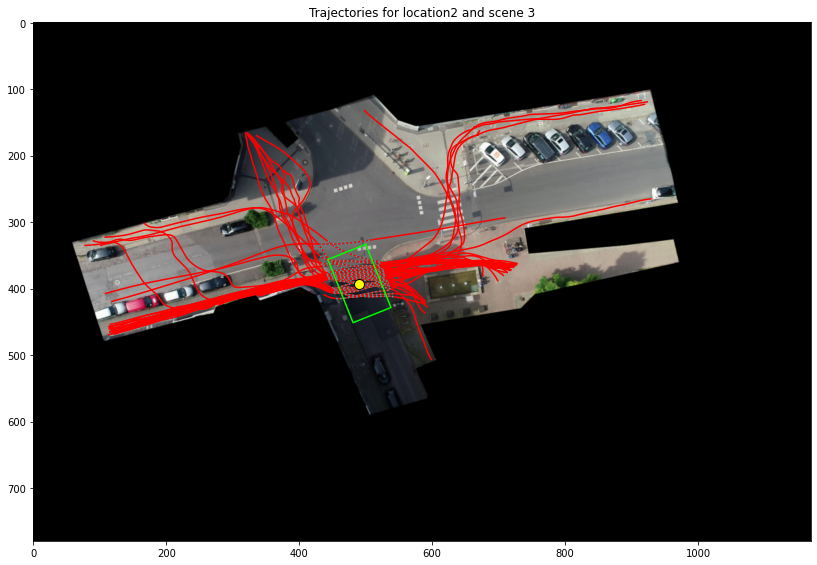

In [17]:
scene30Data = loc2data.getSceneCrossingData(30, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene30Data)

scene31Data = loc2data.getSceneCrossingData(31, 10, 6, refresh=False)
visualizer.showLocationSceneData(scene31Data)

2022-09-26 22:23:50.058 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 22:23:50.061 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 22:23:50.062 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 22/22 [00:01<00:00, 11.92it/s]
2022-09-26 22:23:52.440 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


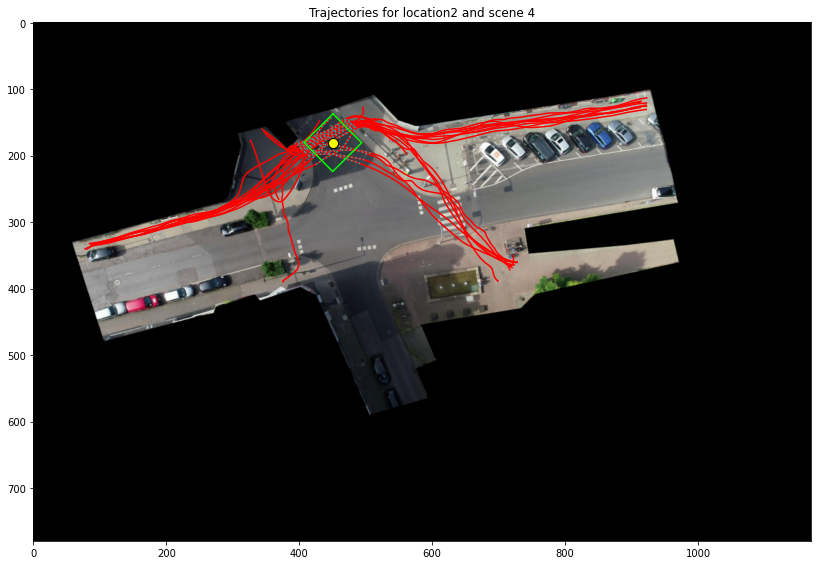

In [18]:
scene4Data = loc2data.getSceneCrossingData(4, 6, 6, refresh=False)
visualizer.showLocationSceneData(scene4Data)

2022-09-26 22:23:54.351 | DEBUG    | extractors.SceneData:_dropWorldCoordinateColumns:62 - Dropping , lonVelocity, latVelocity, lonAcceleration, latAcceleration
2022-09-26 22:23:54.353 | DEBUG    | extractors.SceneData:_transformToLocalCoordinate:66 - transforming trajectories to scene coordinates
2022-09-26 22:23:54.353 | DEBUG    | extractors.SceneData:_clip:129 - clipping trajectories
clipping trajectories: 100%|██████████| 3/3 [00:00<00:00, 11.52it/s]
2022-09-26 22:23:54.673 | INFO     | tools.TrajectoryVisualizer:initPlot:29 - Loading background image from G:AV datasets/inD-dataset-v1.0/data/21_background.png


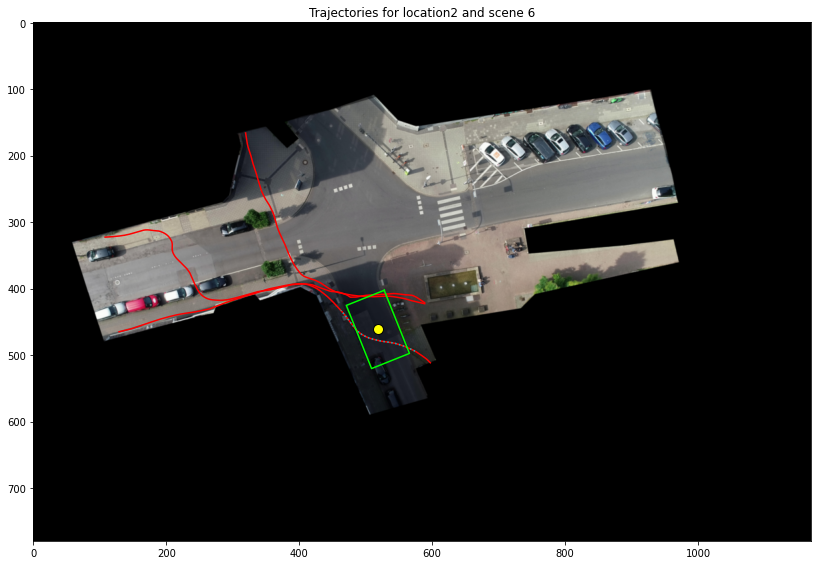